In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set(style="darkgrid")


def smoothing(data, sm=20):
    """
    param data: data
    param sm: 滑动窗口大小
    return: smoothed data
    """
    data_smooth = []
    for i in range(len(data)):
        index_left = i - int(sm / 2) if (i - int(sm / 2)) >= 0 else 0
        index_right = (
            i + int(sm / 2) if (i + int(sm / 2)) < len(data) else len(data) - 1
        )
        data_smooth.append(
            sum(data[index_left:index_right]) / len(data[index_left:index_right])
        )
    return data_smooth


def get_max_min_mean(data, sm=20):
    """
    param data: data
    param sm: 滑动窗口大小
    return: max min mean
    """
    data_max = []
    data_min = []
    data_mean = []
    for i, j in enumerate(data):
        index_left = i - int(sm / 2) if (i - int(sm / 2)) >= 0 else 0
        index_right = (
            i + int(sm / 2) if (i + int(sm / 2)) < len(data) else len(data) - 1
        )
        data_max.append(max(data[index_left:index_right]))
        data_min.append(min(data[index_left:index_right]))
        data_mean.append(
            sum(data[index_left:index_right]) / len(data[index_left:index_right])
        )
    return data_max, data_min, data_mean

In [2]:
def draw_line(
    data_file,
    label,
    color,
    max_min_mean_sm=6,
    smooth_sm=40,
    linewidth="1",
    fill_alpha=0.3,
):
    data = pd.read_csv(filepath_or_buffer=data_file)
    data_x = data["Step"]
    data_y = data["Value"]
    data_mean_smooth_y = smoothing(data=data_y, sm=smooth_sm)
    plt.plot(data_x, data_mean_smooth_y, color=color, label=label, linewidth=linewidth)

In [3]:
def color_generator():
    color_table = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    for c in color_table:
        yield c

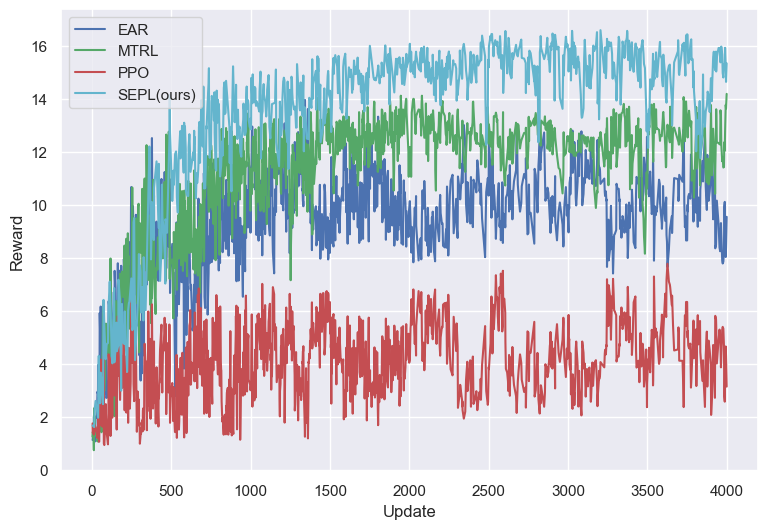

In [4]:
import os

plt.figure(figsize=(9, 6))

path = "Data"
files, labels, colors = [[] for _ in range(3)]
color_g = color_generator()
smooth_sm = 3
linewidth = 1.5
fill_alpha = 0.2

for file in os.listdir(path):
    full_path = os.path.join(path, file)
    if os.path.isfile(full_path) and file.endswith(".csv") and not file.startswith("."):
        files.append(full_path)
        labels.append(file[:-4])
        colors.append(next(color_g))


for file, label, color in zip(files, labels, colors):
    draw_line(
        data_file=file,
        label=label,
        color=color,
        max_min_mean_sm=0,
        smooth_sm=smooth_sm,
        linewidth=linewidth,
        fill_alpha=fill_alpha,
    )


plt.xlabel("Update")
plt.ylabel("Reward")
plt.legend(loc="upper left")
plt.savefig("Reward.pdf", format="pdf", dpi=1200)
plt.show()